In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import numpy as np
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
control_data = pd.read_excel("Control Data.xlsx")

In [47]:
control_data

,lfevnts100,lfevnts101,aerobics,art_craft,auto_motorcycle_racing,auto_parts_repair_accesories_work,auto_work,avid_readers,bank_card,baseball,...,county_code,msa,state,zip11,urbanicity,pct_black,pct_native_american,pct_other_race,pct_pacific_isle,pct_white
0,0,0,0,1,0,0,0,1,1,0,...,111,NaN,ks,6.680134e+10,Suburban,830.0,410.0,NaN,NaN,8750.0
1,0,0,0,0,0,0,1,1,1,0,...,085,17460.0,oh,4.405717e+10,Rural,NaN,50.0,50.0,NaN,9860.0
2,0,0,0,0,0,0,0,1,1,0,...,025,NaN,ma,2.124272e+09,Urban,9510.0,NaN,300.0,NaN,180.0
3,0,0,0,0,0,0,0,0,0,0,...,201,26420.0,tx,7.700967e+10,Urban,NaN,1050.0,2100.0,NaN,5780.0
4,0,0,0,0,0,0,0,0,0,0,...,027,39100.0,ny,1.256755e+10,Rural,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,13,38060.0,AZ,8.534560e+10,U,NaN,NaN,NaN,NaN,NaN
996,0,0,0,0,0,0,0,0,0,0,...,007,NaN,ar,7.271375e+10,NaN,NaN,NaN,NaN,NaN,NaN
997,0,0,0,0,0,0,0,0,0,0,...,119,NaN,wi,5.445197e+10,Rural,NaN,NaN,NaN,NaN,NaN
998,0,0,0,0,0,0,0,0,0,0,...,005,28420.0,wa,9.935417e+10,Suburban,NaN,NaN,NaN,NaN,NaN


In [48]:
treatment_data = pd.read_excel("Exposed Data.xlsx")

In [49]:
treatment_data

,gender,income,contributor_index,credit_card,credit_cards_regular_visa_or_mastercard,creditcard_newissue,family_position,gdiscindex,gen_in_household,inferred_household_rank,...,edu103,child0,child1,child2,child3,child4,chh01,chh04,poc,prpty169
0,M,55000.0,1.0,1.0,1.0,0.0,H,100.0,2.0,1.0,...,0,0,0,0,0,1,0,0,1,0
1,F,58000.0,2.0,1.0,1.0,0.0,NaN,200.0,1.0,4.0,...,0,0,0,1,0,0,1,0,1,0
2,F,82000.0,1.0,1.0,1.0,0.0,NaN,0.0,3.0,2.0,...,0,0,0,0,0,0,0,0,1,0
3,F,100000.0,NaN,0.0,0.0,0.0,NaN,700.0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,0
4,F,76000.0,1.0,1.0,1.0,0.0,W,0.0,2.0,2.0,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,F,55000.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
996,M,75000.0,5.0,1.0,1.0,0.0,M,700.0,3.0,3.0,...,0,0,0,1,0,0,0,0,1,0
997,F,83000.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
998,I,34000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [62]:
glossary = pd.read_excel("Glossary - blu. Master Attribute File.xlsx")

In [63]:
glossary

,Unnamed: 0,Unnamed: 1
0,NaN,NaN
1,Category,Column Header Text
2,Geographic - Census,AVG_COMMUTE_DRIVE_TIME
3,Geographic - Census,AVG_FAMILY_SIZE
4,Geographic - Census,AVG_HH_SIZE
5,Geographic - Census,AVG_HH_SIZE_OWNER_OCCUPIED
6,Geographic - Census,AVG_HH_SIZE_RENTER_OCCUPIED
7,Geographic - Census,AVG_NUM_VEHICLES
8,Geographic - Census,AVG_YRS_EDUCATION
9,Geographic - Census,COUNTY_CODE


In [52]:
control_data.isnull().sum()

lfevnts100                  0
lfevnts101                  0
aerobics                    0
art_craft                   0
auto_motorcycle_racing      0
                         ... 
pct_black                 633
pct_native_american       831
pct_other_race            681
pct_pacific_isle          959
pct_white                 401
Length: 453, dtype: int64

In [53]:
control_data.isnull().sum().sum() 

34989

In [54]:
# how much of the data is missing data
34989 / (1000 * 453)

0.07723841059602649

In [55]:
treatment_data.isnull().sum()

gender                                       0
income                                      28
contributor_index                          436
credit_card                                199
credit_cards_regular_visa_or_mastercard    199
                                          ... 
child4                                       0
chh01                                        0
chh04                                        0
poc                                          0
prpty169                                     0
Length: 453, dtype: int64

In [56]:
treatment_data.isnull().sum().sum()

25030

In [57]:
# how much of the data is missing data
25030 / (1000 * 453)

0.055253863134657834

In [61]:
# column_name_list = list(glossary["Column Header Text"])

In [64]:
# column_name_list

In [65]:
column_name_list = ['prpty169',
 'marital_status',
 'income',
 'gender',
 'edu103',
 'edu102',
 'edu101',
 'edu100',
 'chh04',
 'chh01',
 'age']

In [66]:
# get rid of N/A or missing data using the mode
for i in column_name_list:
    fill = control_data[i].mode()[0]
    control_data[i] = control_data[i].fillna(fill)

In [67]:
for i in column_name_list:
    fill = treatment_data[i].mode()[0]
    treatment_data[i] = treatment_data[i].fillna(fill)

In [68]:
# create the Group column to identify which group the data belongs to before I merge the data

control_data["Group"] = "Control"
treatment_data["Group"] = "Treated"

In [69]:
joined_data = pd.concat([control_data, treatment_data])

In [70]:
joined_data

,lfevnts100,lfevnts101,aerobics,art_craft,auto_motorcycle_racing,auto_parts_repair_accesories_work,auto_work,avid_readers,bank_card,baseball,...,msa,state,zip11,urbanicity,pct_black,pct_native_american,pct_other_race,pct_pacific_isle,pct_white,Group
0,0,0,0,1,0,0,0,1,1,0,...,NaN,ks,6.680134e+10,Suburban,830.0,410.0,NaN,NaN,8750.0,Control
1,0,0,0,0,0,0,1,1,1,0,...,17460.0,oh,4.405717e+10,Rural,NaN,50.0,50.0,NaN,9860.0,Control
2,0,0,0,0,0,0,0,1,1,0,...,NaN,ma,2.124272e+09,Urban,9510.0,NaN,300.0,NaN,180.0,Control
3,0,0,0,0,0,0,0,0,0,0,...,26420.0,tx,7.700967e+10,Urban,NaN,1050.0,2100.0,NaN,5780.0,Control
4,0,0,0,0,0,0,0,0,0,0,...,39100.0,ny,1.256755e+10,Rural,NaN,NaN,NaN,NaN,NaN,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,25420.0,PA,1.703617e+08,S,NaN,NaN,NaN,NaN,NaN,Treated
996,0,0,0,1,0,0,1,1,1,1,...,35620.0,NY,1.031426e+10,U,NaN,NaN,NaN,NaN,999.0,Treated
997,0,0,0,0,0,0,0,0,0,0,...,35620.0,NY,1.141435e+10,U,NaN,9.0,NaN,NaN,960.0,Treated
998,0,0,0,0,0,0,0,0,0,0,...,NaN,LA,7.104050e+10,R,980.0,NaN,NaN,NaN,19.0,Treated


<AxesSubplot:xlabel='age', ylabel='Count'>

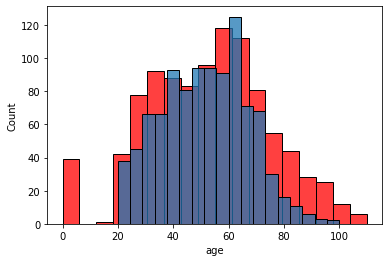

In [31]:
sns.histplot(data=control_data["age"], color="red")
sns.histplot(data=treatment_data["age"])

<AxesSubplot:xlabel='gender', ylabel='Count'>

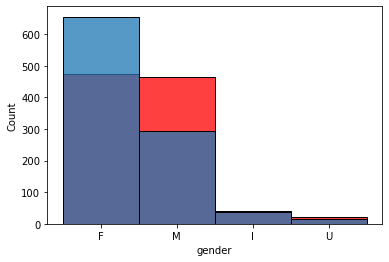

In [32]:
sns.histplot(data=control_data["gender"], color="red")
sns.histplot(data=treatment_data["gender"])

<AxesSubplot:xlabel='income', ylabel='Count'>

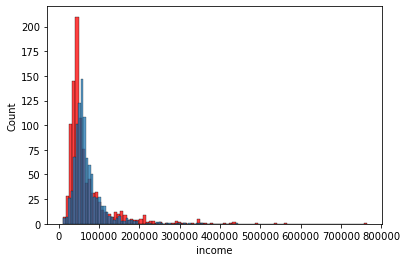

In [33]:
sns.histplot(data=control_data["income"], color="red")
sns.histplot(data=treatment_data["income"])

<AxesSubplot:xlabel='marital_status', ylabel='Count'>

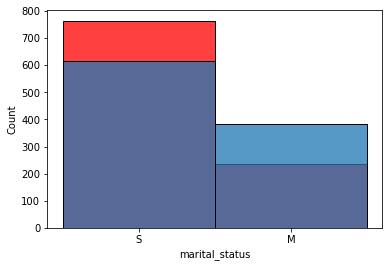

In [34]:
sns.histplot(data=control_data["marital_status"], color="red")
sns.histplot(data=treatment_data["marital_status"])

<AxesSubplot:xlabel='edu100', ylabel='Count'>

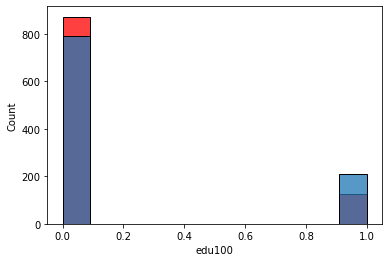

In [35]:
sns.histplot(data=control_data["edu100"], color="red")
sns.histplot(data=treatment_data["edu100"])

<AxesSubplot:xlabel='edu101', ylabel='Count'>

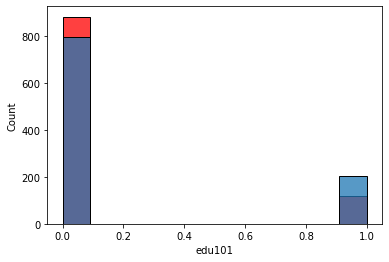

In [36]:
sns.histplot(data=control_data["edu101"], color="red")
sns.histplot(data=treatment_data["edu101"])

<AxesSubplot:xlabel='edu102', ylabel='Count'>

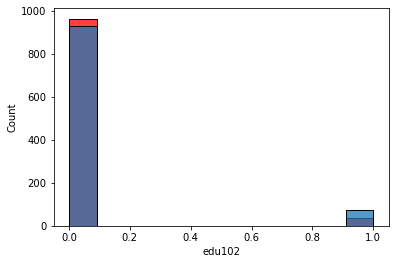

In [37]:
sns.histplot(data=control_data["edu102"], color="red")
sns.histplot(data=treatment_data["edu102"])

<AxesSubplot:xlabel='edu103', ylabel='Count'>

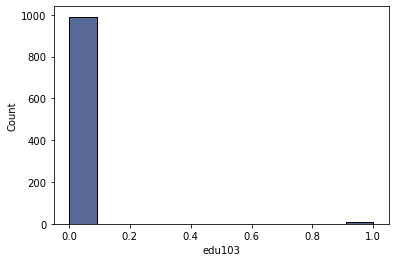

In [38]:
sns.histplot(data=control_data["edu103"], color="red")
sns.histplot(data=treatment_data["edu103"])

<AxesSubplot:xlabel='prpty169', ylabel='Count'>

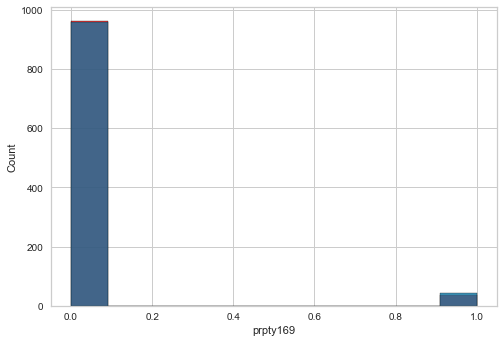

In [457]:
sns.histplot(data=control_data["prpty169"], color="red")
sns.histplot(data=treatment_data["prpty169"])

<AxesSubplot:xlabel='chh04', ylabel='Count'>

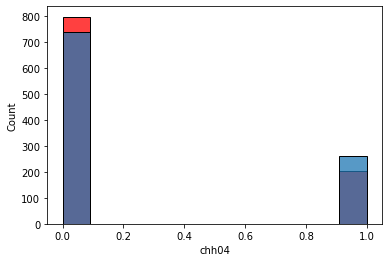

In [40]:
sns.histplot(data=control_data["chh04"], color="red")
sns.histplot(data=treatment_data["chh04"])

<AxesSubplot:xlabel='chh01', ylabel='Count'>

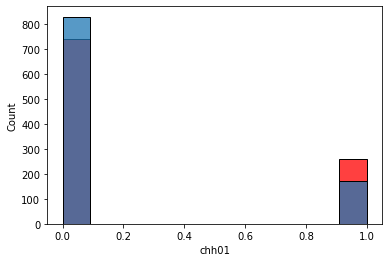

In [41]:
sns.histplot(data=control_data["chh01"], color="red")
sns.histplot(data=treatment_data["chh01"])

In [17]:
#### compare the data sets using independent t-test

In [71]:
joined_column_list = list(joined_data.columns)

In [74]:
# joined_data["gender"] = joined_data["gender"].replace({"F":0, "M":1, "I":2, "U":4})
# joined_data["marital_status"] = joined_data["marital_status"].replace({"S":0, "M":1})

In [75]:
joined_data

,lfevnts100,lfevnts101,aerobics,art_craft,auto_motorcycle_racing,auto_parts_repair_accesories_work,auto_work,avid_readers,bank_card,baseball,...,msa,state,zip11,urbanicity,pct_black,pct_native_american,pct_other_race,pct_pacific_isle,pct_white,Group
0,0,0,0,1,0,0,0,1,1,0,...,NaN,ks,6.680134e+10,Suburban,830.0,410.0,NaN,NaN,8750.0,Control
1,0,0,0,0,0,0,1,1,1,0,...,17460.0,oh,4.405717e+10,Rural,NaN,50.0,50.0,NaN,9860.0,Control
2,0,0,0,0,0,0,0,1,1,0,...,NaN,ma,2.124272e+09,Urban,9510.0,NaN,300.0,NaN,180.0,Control
3,0,0,0,0,0,0,0,0,0,0,...,26420.0,tx,7.700967e+10,Urban,NaN,1050.0,2100.0,NaN,5780.0,Control
4,0,0,0,0,0,0,0,0,0,0,...,39100.0,ny,1.256755e+10,Rural,NaN,NaN,NaN,NaN,NaN,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,25420.0,PA,1.703617e+08,S,NaN,NaN,NaN,NaN,NaN,Treated
996,0,0,0,1,0,0,1,1,1,1,...,35620.0,NY,1.031426e+10,U,NaN,NaN,NaN,NaN,999.0,Treated
997,0,0,0,0,0,0,0,0,0,0,...,35620.0,NY,1.141435e+10,U,NaN,9.0,NaN,NaN,960.0,Treated
998,0,0,0,0,0,0,0,0,0,0,...,NaN,LA,7.104050e+10,R,980.0,NaN,NaN,NaN,19.0,Treated


In [76]:
p_value_list = []
num_col_list = []
for i in joined_column_list:
    try:
        p = ttest_ind(np.array(joined_data[joined_data["Group"] == "Control"][i]), np.array(joined_data[joined_data["Group"] == "Treated"][i]), equal_var=False)[1]
        if np.isnan(p) == False:
            p_value_list.append(p)
            num_col_list.append(i)
        else:
            fill = joined_data.mode()[0]
            joined_data[i] = joined_data[i].fillna(fill)
            p = ttest_ind(np.array(joined_data[joined_data["Group"] == "Control"][i]), np.array(joined_data[joined_data["Group"] == "Treated"][i]), equal_var=False)[1]
            p_value_list.append(p)
            num_col_list.append(i)
    except:
        pass

In [77]:
p_value_list_dict = dict(zip(num_col_list, p_value_list))

In [78]:
p_value_list_dict

{'lfevnts100': 0.41377852686506444,
 'lfevnts101': 0.15740301409856122,
 'aerobics': 1.1020040416126225e-17,
 'art_craft': 2.0344746448084696e-26,
 'auto_motorcycle_racing': 4.853663784067747e-08,
 'auto_parts_repair_accesories_work': 5.707561716352974e-05,
 'auto_work': 1.7321441346621333e-15,
 'avid_readers': 2.5903856478919443e-30,
 'bank_card': 2.7776929522618226e-15,
 'baseball': 1.4494196783641386e-12,
 'basketball': 1.0428459041352202e-16,
 'boating_or_sailing': 1.0905163034006756e-05,
 'bookbuyer': 1.896496071020893e-14,
 'camping_or_hiking': 1.3716321608136972e-15,
 'career_minded': 1.0100955521490066e-14,
 'cars': 1.5824688617789025e-11,
 'casino_gambling': 9.718624297364282e-13,
 'cc_premium_american_express': 0.0005813376480885939,
 'cc_premium_discover': 0.0004429231101666683,
 'cc_premium_store_or_retail': 5.4176804864917035e-08,
 'cc_premium_visa_or_mastercard': 2.0133734667160529e-07,
 'cc_regular_american_express': 5.9329206826764944e-05,
 'cc_regular_discover': 9.2460

In [79]:
significant_list = []
for i in num_col_list:
    if p_value_list_dict[i] <= 0.00000000000000000000000001:
        significant_list.append(i)

In [80]:
len(significant_list)

15

In [81]:
significant_list

['avid_readers',
 'consumer_electronics',
 'food',
 'hobby_cooking',
 'hobby_cooking_gourmet',
 'hobby_crafts',
 'hobbyists',
 'home_decor',
 'sports',
 'sweepstakes_contest',
 'travel',
 'chr04',
 'prpty053',
 'child0',
 'poc']

In [82]:
joined_data = joined_data[['avid_readers',
 'consumer_electronics',
 'food',
 'hobby_cooking',
 'hobby_cooking_gourmet',
 'hobby_crafts',
 'hobbyists',
 'home_decor',
 'sports',
 'sweepstakes_contest',
 'travel',
 'chr04',
 'prpty053',
 'child0',
 'poc', "Group"]]

In [83]:
joined_data

,avid_readers,consumer_electronics,food,hobby_cooking,hobby_cooking_gourmet,hobby_crafts,hobbyists,home_decor,sports,sweepstakes_contest,travel,chr04,prpty053,child0,poc,Group
0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,1,Control
1,1,1,0,0,0,0,0,1,1,0,0,1,0,0,1,Control
2,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,Control
3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,Control
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Treated
996,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,Treated
997,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Treated
998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Treated


In [84]:
joined_data["Group"] = joined_data["Group"].replace({"Control":0, "Treated":1})

<ipython-input-84-7dc32bd3ac5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_data["Group"] = joined_data["Group"].replace({"Control":0, "Treated":1})


In [85]:
joined_data

,avid_readers,consumer_electronics,food,hobby_cooking,hobby_cooking_gourmet,hobby_crafts,hobbyists,home_decor,sports,sweepstakes_contest,travel,chr04,prpty053,child0,poc,Group
0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,1,0
1,1,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0
2,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
996,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1
997,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [66]:
#### Finding the right number of clusters for the control group

In [86]:
top_significant_list = []
for i in num_col_list:
    if p_value_list_dict[i] <= 0.000000000000000000000000001:
        top_significant_list.append(i)

In [87]:
len(top_significant_list)

10

In [88]:
top_significant_list

['avid_readers',
 'consumer_electronics',
 'food',
 'hobby_cooking',
 'hobby_cooking_gourmet',
 'hobbyists',
 'sweepstakes_contest',
 'chr04',
 'child0',
 'poc']

In [89]:
small_joined_data = joined_data[['chr04', 'child0']]

In [90]:
k = range(1,16)
wss = []

for i in k:
    kmeans = cluster.KMeans(n_clusters = i, init = "k-means++")
    kmeans = kmeans.fit(small_joined_data)
    wss_poop = kmeans.inertia_
    wss.append(wss_poop)

<ipython-input-90-c3bc878f54ab>:6: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans = kmeans.fit(small_joined_data)
<ipython-input-90-c3bc878f54ab>:6: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans = kmeans.fit(small_joined_data)
<ipython-input-90-c3bc878f54ab>:6: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans = kmeans.fit(small_joined_data)
<ipython-input-90-c3bc878f54ab>:6: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans = kmeans.fit(small_joined_data)
<ipython-input-90-c3bc878f54ab>:6: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans = kmeans.fit(small_joi

In [91]:
cluster_set = pd.DataFrame({'Clusters':k, 'wss':wss})
cluster_set

,Clusters,wss
0,1,8.460415e+02
1,2,3.365294e+02
2,3,1.050330e+02
3,4,6.232802e-28
4,5,5.926348e-28
5,6,6.175702e-28
6,7,6.114689e-28
7,8,6.415627e-28
8,9,6.480384e-28
9,10,5.494632e-28


<AxesSubplot:xlabel='Clusters', ylabel='wss'>

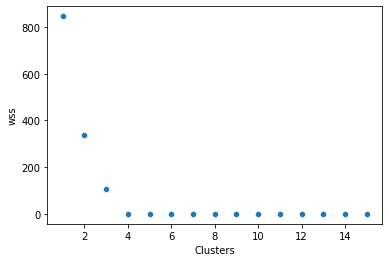

In [92]:
sns.scatterplot(x = "Clusters", y="wss", data = cluster_set)

In [93]:
for i in range(2,16):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(small_joined_data).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(small_joined_data,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.7152092106990131
Silhouette score for k(clusters) = 3 is 0.8926315789473684
Silhouette score for k(clusters) = 4 is 1.0
Silhouette score for k(clusters) = 5 is 1.0
Silhouette score for k(clusters) = 6 is 1.0
Silhouette score for k(clusters) = 7 is 1.0


<ipython-input-93-362dd02144a7>:2: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(small_joined_data).labels_
<ipython-input-93-362dd02144a7>:2: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(small_joined_data).labels_
<ipython-input-93-362dd02144a7>:2: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(small_joined_data).labels_
<ipython-input-93-362dd02144a7>:2: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  labels=cluster.KMeans(n_clusters=i,init="k-me

Silhouette score for k(clusters) = 8 is 1.0
Silhouette score for k(clusters) = 9 is 1.0
Silhouette score for k(clusters) = 10 is 1.0


<ipython-input-93-362dd02144a7>:2: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(small_joined_data).labels_
<ipython-input-93-362dd02144a7>:2: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(small_joined_data).labels_


Silhouette score for k(clusters) = 11 is 1.0


<ipython-input-93-362dd02144a7>:2: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(small_joined_data).labels_


Silhouette score for k(clusters) = 12 is 1.0
Silhouette score for k(clusters) = 13 is 1.0
Silhouette score for k(clusters) = 14 is 1.0
Silhouette score for k(clusters) = 15 is 1.0


<ipython-input-93-362dd02144a7>:2: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(small_joined_data).labels_
<ipython-input-93-362dd02144a7>:2: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(small_joined_data).labels_
<ipython-input-93-362dd02144a7>:2: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(small_joined_data).labels_


In [94]:
# ^ I chose 3 as the number of clusters

In [95]:
kmeans = cluster.KMeans(n_clusters=3 ,init="k-means++")
kmeans = kmeans.fit(joined_data[['chr04', 'child0']])

In [96]:
joined_data["Clusters"] = kmeans.labels_

<ipython-input-96-1f3a03b4fc7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_data["Clusters"] = kmeans.labels_


<AxesSubplot:xlabel='chr04', ylabel='child0'>

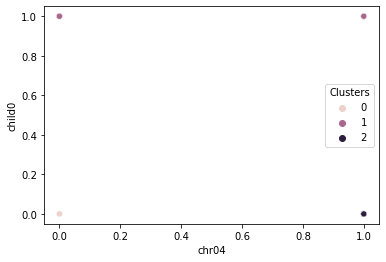

In [97]:
sns.scatterplot(x="chr04", y="child0",hue = 'Clusters',  data=joined_data)

In [98]:
#### factor analysis using a heatmap

<AxesSubplot:>

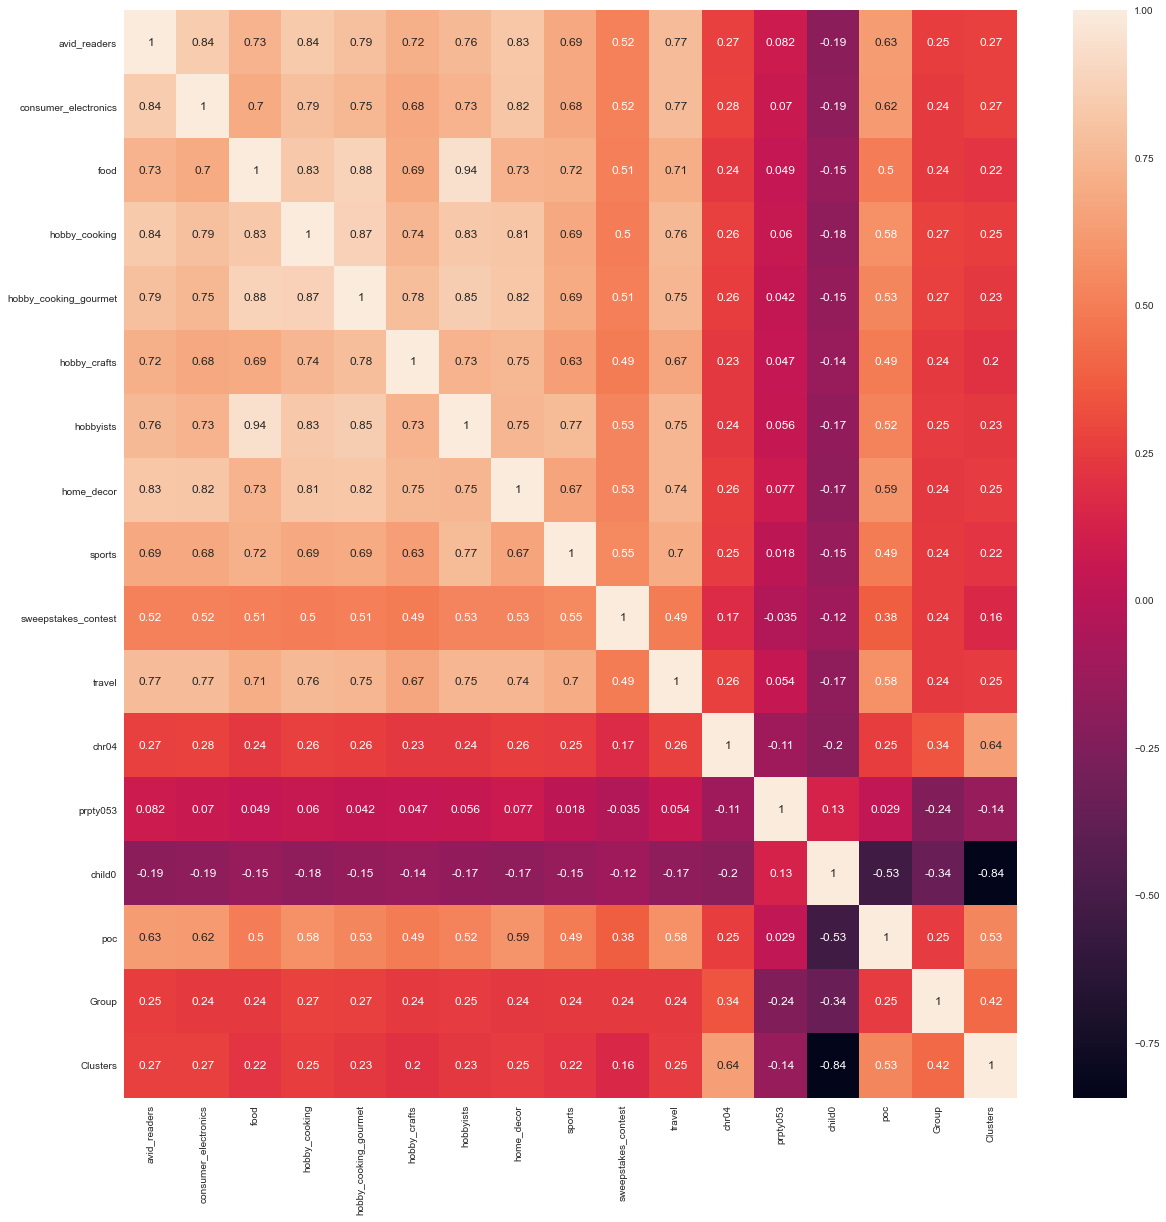

In [195]:
plt.subplots(figsize=(20,20))
sns.heatmap(joined_data.corr(), annot=True)

In [229]:
# I pick sweepstakes, poc, child0, prpty053, chr04 and hobbyists

In [230]:
#### Logistic Regression

In [ ]:
joined_data = joined_data.rename(columns={"Group":"Email_Sign_Up"})

In [279]:
joined_data = joined_data[[
 'hobbyists',
 'sweepstakes_contest',
 'chr04',
 'prpty053',
 'child0',
 'poc',
 'Email_Sign_Up']]

In [280]:
joined_data

,hobbyists,sweepstakes_contest,chr04,prpty053,child0,poc,Email_Sign_Up
0,0,0,0,0,0,1,0
1,0,0,1,0,0,1,0
2,0,0,1,0,0,1,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,1
996,1,1,1,0,0,1,1
997,0,0,1,0,0,0,1
998,0,0,0,0,0,0,1


In [282]:
folds = StratifiedKFold(n_splits=3)

In [284]:
X = joined_data.drop(columns=["Email_Sign_Up"])

In [285]:
y = joined_data["Email_Sign_Up"]

In [286]:
for training_index, test_index in folds.split(X, y):
    print("Training Indexes")
    print(training_index)
    print("\n")
    print("Test Indexes")
    print(test_index)
    print("\n")
    print("----------------------------------------------------------------------------")
    print("\n")

Training Indexes
[ 334  335  336 ... 1997 1998 1999]


Test Indexes
[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159  160  161  162  163  164  165  166  167
  168  169  170  171  172  173  174  175  176  177  178  179  180  181
  182  18

In [289]:
X = np.array(X)
y = np.array(y)

In [325]:
scores_svm = []
scores_rf = []
scores_log = []

svm = SVC(gamma='auto')
rf = RandomForestClassifier(n_estimators=40)
log = LogisticRegression()

In [326]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [327]:
for train_index, test_index in folds.split(X, y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], \
                                       y[train_index], y[test_index]
    
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=20), X_train, X_test, y_train, y_test))
    scores_log.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))

In [328]:
np.average(scores_svm)

0.6919910915413164

In [329]:
np.average(scores_rf)

0.7089833461647554

In [330]:
np.average(scores_log)

0.7099858479168825

In [331]:
log.fit(X_train, y_train)

LogisticRegression()

In [337]:
list(log.predict_proba(X))

[array([0.76966774, 0.23033226]),
 array([0.44775014, 0.55224986]),
 array([0.44775014, 0.55224986]),
 array([0.91061742, 0.08938258]),
 array([0.91061742, 0.08938258]),
 array([0.91061742, 0.08938258]),
 array([0.71197504, 0.28802496]),
 array([0.38398492, 0.61601508]),
 array([0.71981277, 0.28018723]),
 array([0.71981277, 0.28018723]),
 array([0.76966774, 0.23033226]),
 array([0.99441734, 0.00558266]),
 array([0.57792102, 0.42207898]),
 array([0.98317184, 0.01682816]),
 array([0.91061742, 0.08938258]),
 array([0.71981277, 0.28018723]),
 array([0.91061742, 0.08938258]),
 array([0.97409411, 0.02590589]),
 array([0.38398492, 0.61601508]),
 array([0.71981277, 0.28018723]),
 array([0.24937349, 0.75062651]),
 array([0.57792102, 0.42207898]),
 array([0.38398492, 0.61601508]),
 array([0.91061742, 0.08938258]),
 array([0.4136206, 0.5863794]),
 array([0.44775014, 0.55224986]),
 array([0.74952401, 0.25047599]),
 array([0.38398492, 0.61601508]),
 array([0.57792102, 0.42207898]),
 array([0.983171

In [340]:
log.score(X,y)

0.7225

In [343]:
confusion_matrix(y, log.predict(X))

array([[693, 307],
       [248, 752]])

In [358]:
#### testing theories on the data effecting the results of the model

In [419]:
osc_1 = [0,1,0,0,0,1,0,1,0,0]
osc_2 = [1,0,1,1,0,1,0,1,0,0]
osc_3 = [0,1,0,0,1,0,1,0,1,1]

vsc_1 = [0,1,2,3,0,4,0,1,0,5]
vsc_2 = [1,2,3,0,2,4,1,5,1,0]
vsc_3 = [0,1,1,0,1,0,1,0,1,0]

bsc_1 = [22,11,45,27,46,19,86,72,14,18]
bsc_2 = [22,21,65,27,46,19,86,52,14,18]
bsc_3 = [0,1,1,1,0,1,0,0,1,0]

In [420]:
test_set_1 = pd.DataFrame({"C1":osc_1, "C2":osc_2, "C3":osc_3})
test_set_1

,C1,C2,C3
0,0,1,0
1,1,0,1
2,0,1,0
3,0,1,0
4,0,0,1
5,1,1,0
6,0,0,1
7,1,1,0
8,0,0,1
9,0,0,1


In [421]:
test_set_2 = pd.DataFrame({"C1":vsc_1, "C2":vsc_2, "C3":vsc_3})
test_set_2

,C1,C2,C3
0,0,1,0
1,1,2,1
2,2,3,1
3,3,0,0
4,0,2,1
5,4,4,0
6,0,1,1
7,1,5,0
8,0,1,1
9,5,0,0


In [422]:
test_set_3 = pd.DataFrame({"C1":bsc_1, "C2":bsc_2, "C3":bsc_3})
test_set_3

,C1,C2,C3
0,22,22,0
1,11,21,1
2,45,65,1
3,27,27,1
4,46,46,0
5,19,19,1
6,86,86,0
7,72,52,0
8,14,14,1
9,18,18,0


In [423]:
test_set_4 = test_set_1[0:9]
test_set_4

,C1,C2,C3
0,0,1,0
1,1,0,1
2,0,1,0
3,0,1,0
4,0,0,1
5,1,1,0
6,0,0,1
7,1,1,0
8,0,0,1


In [424]:
test_set_5 = test_set_1[0:7]
test_set_5

,C1,C2,C3
0,0,1,0
1,1,0,1
2,0,1,0
3,0,1,0
4,0,0,1
5,1,1,0
6,0,0,1


In [425]:
folds = StratifiedKFold(n_splits=3)

x1 = test_set_1.drop(columns="C3")
x2 = test_set_2.drop(columns="C3")
x3 = test_set_3.drop(columns="C3")
x4 = test_set_4.drop(columns="C3")
x5 = test_set_5.drop(columns="C3")

y1 = test_set_1["C3"]
y2 = test_set_2["C3"]
y3 = test_set_3["C3"]
y4 = test_set_4["C3"]
y5 = test_set_5["C3"]

x1 = np.array(x1)
x2 = np.array(x2)
x3 = np.array(x3)
x4 = np.array(x4)
x5 = np.array(x5)

y1 = np.array(y1)
y2 = np.array(y2)
y3 = np.array(y3)
y4 = np.array(y4)
y5 = np.array(y5)

In [426]:
scores_log = []

for train_index, test_index in folds.split(x1, y1):
    X_train, X_test, y_train, y_test = x1[train_index], x1[test_index], \
                                       y1[train_index], y1[test_index]
    scores_log.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
    
print(str(np.average(scores_log)))

1.0


In [427]:
scores_log = []

for train_index, test_index in folds.split(x2, y2):
    X_train, X_test, y_train, y_test = x2[train_index], x2[test_index], \
                                       y2[train_index], y2[test_index]
    scores_log.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
    
print(str(np.average(scores_log)))

0.611111111111111


In [428]:
folds = KFold(n_splits=3)

scores_log = []

for train_index, test_index in folds.split(x3, y3):
    X_train, X_test, y_train, y_test = x3[train_index], x3[test_index], \
                                       y3[train_index], y3[test_index]
    scores_log.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
    
print(str(np.average(scores_log)))

0.5


In [429]:
scores_log = []

for train_index, test_index in folds.split(x4, y4):
    X_train, X_test, y_train, y_test = x4[train_index], x4[test_index], \
                                       y4[train_index], y4[test_index]
    scores_log.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
    
print(str(np.average(scores_log)))

0.7777777777777778


In [430]:
scores_log = []

for train_index, test_index in folds.split(x5, y5):
    X_train, X_test, y_train, y_test = x5[train_index], x5[test_index], \
                                       y5[train_index], y5[test_index]
    scores_log.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
    
print(str(np.average(scores_log)))

1.0


In [16]:
joined_data.to_excel("joined_data.xlsx")

In [44]:
joined_data.to_excel("joined_data2.xlsx")